In [35]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_contents = sio.loadmat("data.mat")

In [28]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 27 20:46:03 2017',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]], dtype=int16), array([[ 6.09821195, -2.85402497,  1.48145717, ..., -0.49821161,
                  1.23387217, -0.17849095],
                [ 1.88067824, -1.04162668,  1.03535319, ...,  7.52382044,
                 14.33280283,  1.94148639],
                [-0.51928288,  0.3472429 ,  0.6902772 , ..., -5.49232456,
                  2.45753815,  7.28595913],
                ...,
                [-2.5791475 ,  0.51616423, -3.97938245, ..., 14.71756657,
                 14.72548276, 21.42958369],
                [ 0.3430844 ,  2.08256528,  3.78056853, ..., 13.28018469,
             

In [37]:
rot = mat_contents["data"]["rotation"][0][0]
target_error = mat_contents["data"]["target_error"][0][0]
hand_angle = mat_contents["data"]["hand_angle"][0][0]
explicit = mat_contents["data"]["explicit"][0][0]
implicit = mat_contents["data"]["implicit"][0][0]

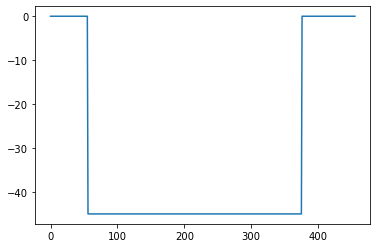

In [50]:
plt.plot(rot[0])

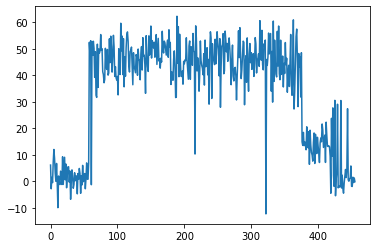

In [38]:
plt.plot(hand_angle[0])

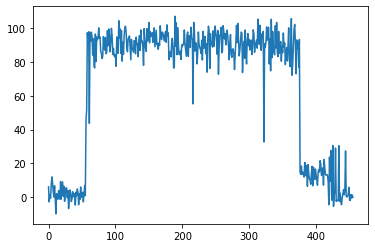

In [39]:
plt.plot(target_error[0])

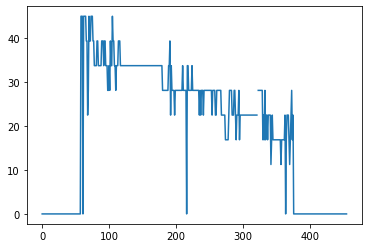

In [41]:
plt.plot(explicit[0])

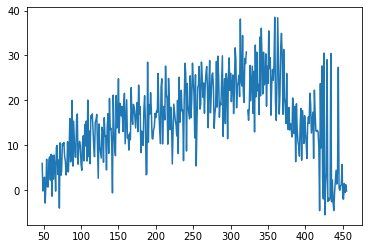

In [42]:
plt.plot(implicit[0])